# Описание данных:

**Мы будем рассматривать набор данных о домах и населении, находящихся в Калифорнии, и некоторые сводные статистические данные о них, основанные на данных переписи населения 1990 года.**

Об этом файле
1. longitude: Мера того, как далеко на запад находится дом; чем больше значение, тем дальше на запад.

2. latitude:  Мера того, как далеко на север находится дом; более высокое значение - дальше на север.

3. housingMedianAge: средний возраст дома в пределах квартала; меньшее число означает более новое здание.

4. totalRooms: Общее число домов\квартир

5. totalBedrooms: Общее число жилых помещений в домах\квартирах

6. population: Общее количество людей, проживающих в квартале

7. households: Общее количество домохозяйств, группа людей, проживающих в одном квартале.

8. medianIncome: Медианный доход для домохозяйств в пределах квартала домов (измеряется в десятках тысяч долларов США)

9. medianHouseValue: Медианная стоимость дома для домохозяйств в пределах квартала (измеряется в долларах США)

10. oceanProximity: Расположение дома по отношению к океану/морю

# Начало работы:

In [69]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

# Подготовка данных и EDA

In [70]:
#загружаем датасет
houses = pd.read_csv('../input/house-price/house_prices.csv')

In [71]:
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0years,880,129.0,322,126,8.3252,452600.0$,NEAR BAY
1,-122.22,37.86,21.0,7099,1106.0,2401,1138,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467,190.0,496,177,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274,235.0,558,219,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627,280.0,565,259,3.8462,342200.0,NEAR BAY


In [72]:
#смотрим на размер датафрейма
houses.shape

(20640, 10)

In [73]:
#смотрим на размер датафрейма с удалёнными дупликатами(если они есть)
houses_remove_duplicates = pd.DataFrame.drop_duplicates(houses)
houses_remove_duplicates.shape

(20640, 10)

**как можно заметить, повторов в нашем датасете нет**

**Посмотрим общую информация о датасете(количество значений и их тип), в данном случае видим, что у нас есть некоторые пропуски в признаке "total_bedrooms", к которым мы позже вернёмся**

In [74]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  object 
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  object 
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 1.6+ MB


In [75]:
houses['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

**замечаем, что в признаках "housing_median_age" и "median_house_value" есть строковые значения, 
подготовим их для приведения признаков к числовому виду при помощи функции map 
и затем приведём данные признаки к числовому значению с помощью astype**

In [76]:

houses['housing_median_age'] = houses['housing_median_age'].map(lambda x: x.rstrip('years')).astype(float)
houses['median_house_value'] = houses['median_house_value'].map(lambda x: x.rstrip('$')).astype(float)

houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,129.0,322,126,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099,1106.0,2401,1138,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467,190.0,496,177,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274,235.0,558,219,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627,280.0,565,259,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845,330,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697,150.0,356,114,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254,485.0,1007,433,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860,409.0,741,349,1.8672,84700.0,INLAND


In [77]:
#приведение признаков к целочисленному значению
houses['housing_median_age'] = houses['housing_median_age'].astype(int)
houses['housing_median_age'] = houses['housing_median_age'].astype(int)
houses['median_house_value'] = houses['median_house_value'].astype(int)

In [78]:
#обычно доход измеряется в десятках тысяч долларов, поэтому я приведу это к общему порядку, чтобы доход соответствовал ценам на жильё
houses['median_income'] = houses['median_income']*10000

In [79]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


Метод describe показывает основные статистические характеристики данных по каждому числовому признаку (типы int64 и float64)

In [80]:
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,38706.710029,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,18998.217179,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,4999.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,25634.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,35348.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,47432.500000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,150001.000000,500001.000000


Посмотрим кол-во пропущенных значений для признака "total_bedrooms":

In [81]:
missing_value = houses['total_bedrooms'].isna().sum()
missing_value

207

In [82]:
(missing_value / houses.shape[0]) * 100

1.002906976744186

Видим, что процент пропущенных значений от всех данных составляет 1%.
Можно заменить пропуски на нулевые значения (возможно это дома, в которых только квартиры-студии или это офисные здания, где не предполагается наличие спален)
С другой стороны это могут быть повреждённые данные и в этих домах на самом деле признак "total_bedrooms" не равен 0. В таких случаях значения можно заменить на средние или медианные значения.
Но в нашем случае лучше будет удалить строки с пропусками, чтобы это в дальнейшем не повлияло на точность предсказаний.

In [83]:
houses = houses.dropna(axis=0)

In [84]:
houses['total_bedrooms'] = houses['total_bedrooms'].astype(int)

Cоздадим новый бинарный признак 'price_category', который указывает, что значение 'median_house_value' больше или равно 150000 (1), и (0) если меньше:

In [85]:
houses['price_category'] = houses['median_house_value'].apply(lambda x: 1 if x >= 150000 else 0)
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category
0,-122.23,37.88,41,880,129,322,126,83252.0,452600,NEAR BAY,1
1,-122.22,37.86,21,7099,1106,2401,1138,83014.0,358500,NEAR BAY,1
2,-122.24,37.85,52,1467,190,496,177,72574.0,352100,NEAR BAY,1
3,-122.25,37.85,52,1274,235,558,219,56431.0,341300,NEAR BAY,1
4,-122.25,37.85,52,1627,280,565,259,38462.0,342200,NEAR BAY,1


**Сделаем предварительный сравнительный анализ по всем числовым критериям с разбивкой по целевому признаку (стоимость дома выше или ниже 150000):**

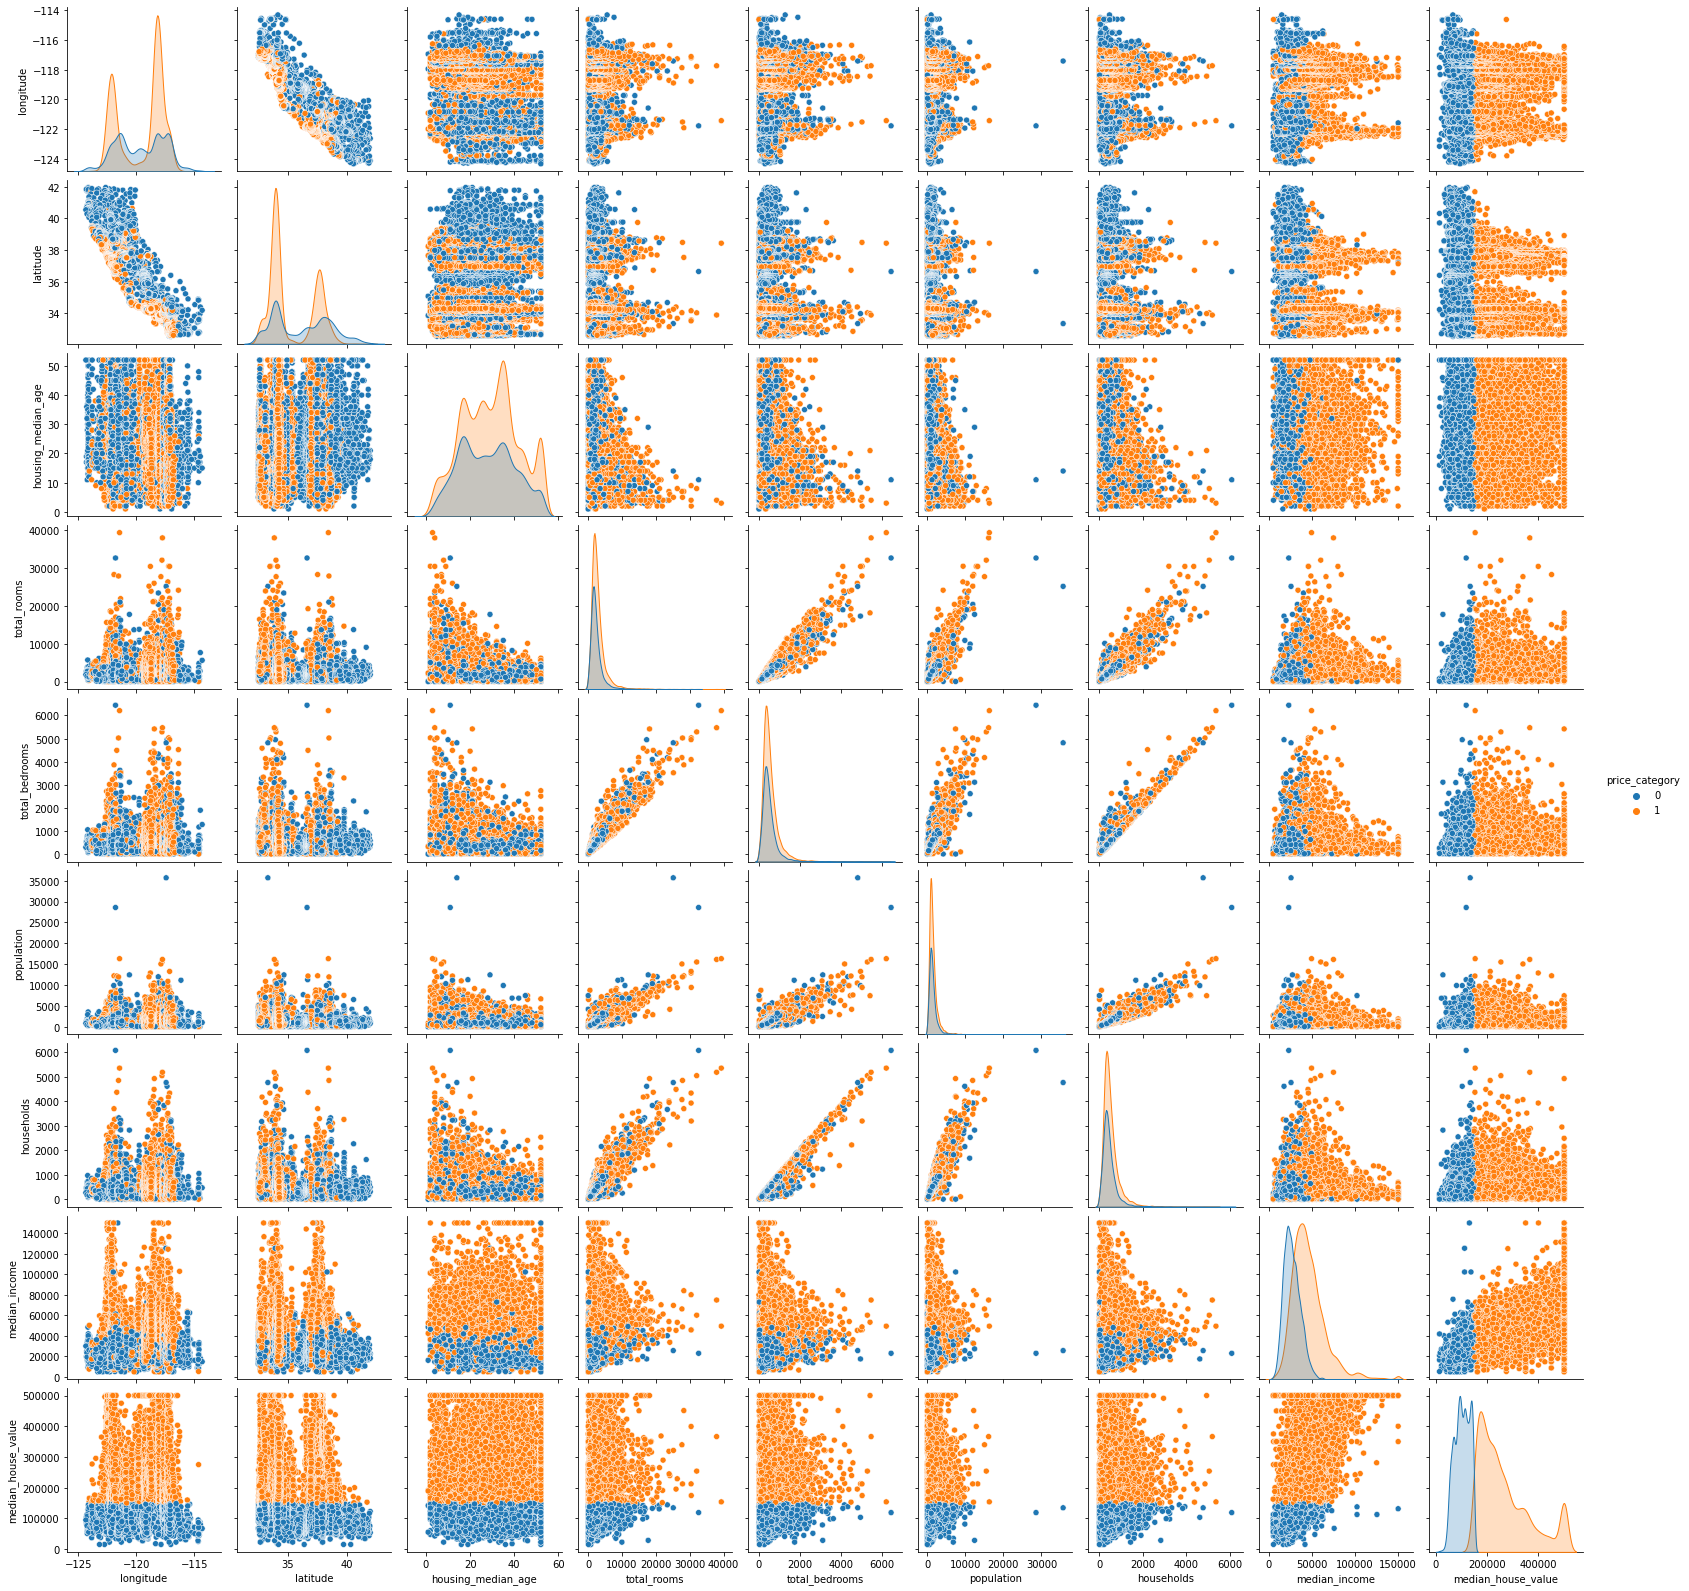

In [86]:
sns.pairplot(houses, hue='price_category')

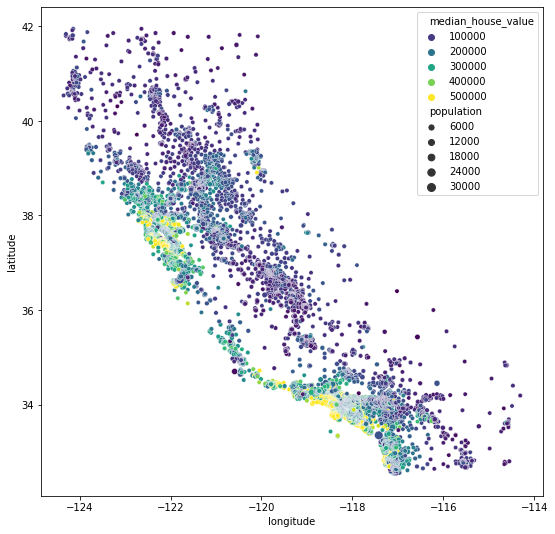

In [87]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', size='population', data=houses, palette='viridis')
plt.show()

**можно заметить, что чем ближе к океану находится дом, тем он дороже стоит**

**Построим график распределения жилья с указанием категории расположения дома**

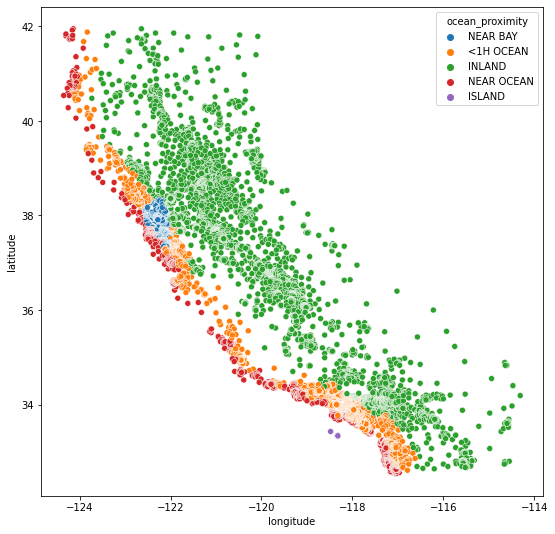

In [88]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='longitude', y='latitude', hue='ocean_proximity', data=houses)
plt.show()

**Если сравнить данный график с предыдущим, то можем увидеть, что высокая стоимость наблюдается непосредственно возле океана, а также постепенно начинает расти при приближении к пляжу**

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

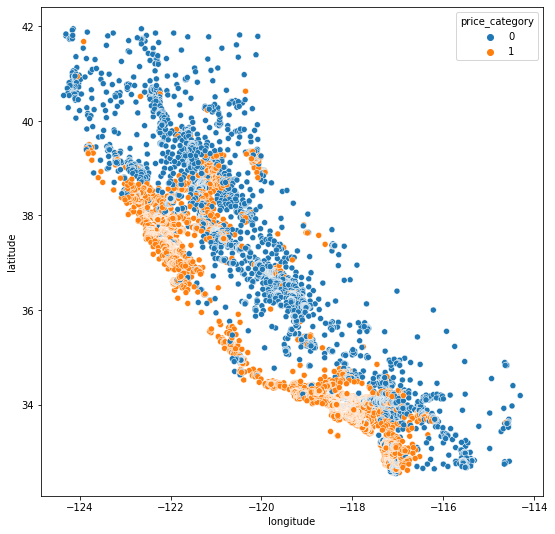

In [89]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='longitude', y='latitude', hue='price_category', data=houses)

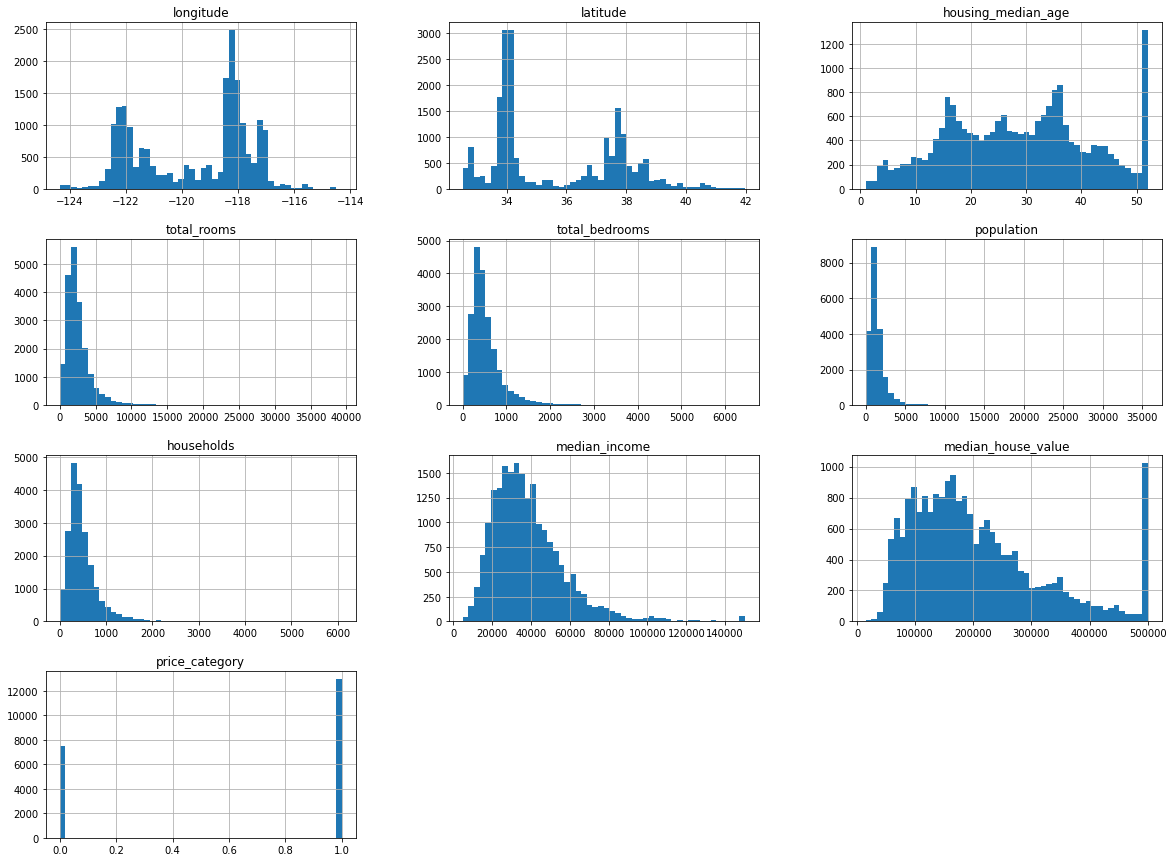

In [90]:
%matplotlib inline
houses.hist(bins = 50, figsize= (20,15))
plt.show()

**Мы видим, что область, где частота медианных цен >= 500000 больше, может быть выбросом или неверными данными**


**Посмотрим подробнее на этот "хвост" с выбросами:**

In [91]:
houses[houses['median_house_value']>450000]['median_house_value'].value_counts().head()

500001    958
500000     27
475000      7
483300      6
466700      4
Name: median_house_value, dtype: int64

Отфильтруем данные с порогом значений больше 500000$

In [92]:
houses=houses.loc[houses['median_house_value']<500001,:]

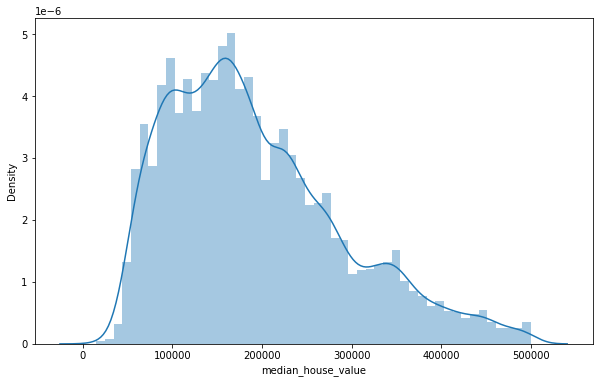

In [93]:
plt.figure(figsize=(10,6))
sns.distplot(houses['median_house_value'])
plt.show()

# Выбор самой оптимальной модели предсказания

**Теперь нам необходимо выбрать оптимальную модель предсказания. Под оптимальной я понимаю то, чтобы она была достаточно точной, но при этом не обучалась очень долгое время. Ведь зачем нам в конкретно данном случае модель с точность допустим 90%, которая обучается несколько часов, когда мы можем достичь точности в 85-87% с помощью более простой модели, обученной за несколько секунд?**

**Загрузим необходимые библиотеки:**

In [94]:
from time import process_time
from sklearn import tree
from sklearn.tree import export_text
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

Подготовим данные для обучения. Нам необходимо разбить нашу выборку на тренировочную (ту по которой мы будем обучать наши модели) и тестовую (ту по которой мы будем проверять на сколько хорошо наша модель работает).

Для подбора наилучших параметров мы будем использовать *GridSearchCV*

*GridSearchCV* находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров. Важно отметить, что такой подход может быть весьма времязатратным.
Если бы наш датасет был намного больше или мы бы хотели сократить время обучения, то мы бы могли воспользоваться *RandomizedSearchCV*, основная особенность *RandomizedSearchCV* заключается в том, что выбор параметров является случайным, что позволяет сократить время на обучение.

In [95]:
#заменим категориальные переменные на числовые для дальнейшей работы
houses['ocean_proximity'] = houses['ocean_proximity'].replace({'ISLAND': 1,
                                          'NEAR OCEAN': 2,
                                          '<1H OCEAN': 3,
                                          'NEAR BAY': 4,
                                          'INLAND': 5})

In [96]:
X = houses.drop(['median_house_value', 'price_category'], axis=1)
y = houses.price_category

In [97]:
# тестовую выборку возьмём равную 33% от общего числа всей выборки, зададим random_state для повторяемости всех процессов:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [98]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13612,-117.25,34.13,33,2898,503,1374,487,36856.0,5
8696,-118.34,33.86,35,1936,343,1008,346,54791.0,3
20147,-119.08,34.34,23,3065,723,2042,698,27593.0,3
10475,-117.68,33.60,24,1956,262,969,256,68154.0,3
4694,-118.37,34.07,52,2195,435,884,432,52400.0,3


In [99]:
metrics_score = pd.DataFrame(columns=['precision', 'recall', 'f-value', 'time']) #создадим пустой датафрейм для последующего сравнения точности наших моделей

## Дерево решений

Разделение данных на подвыборки по определенному условию в виде древовидной структуры. Математически разделение на классы происходит до тех пор, пока не найдутся все условия, определяющие класс максимально точно, т. е. когда в каждом классе отсутствуют представители другого класса.

In [100]:
dt = tree.DecisionTreeClassifier(random_state=42) # создадим "пустое" дерево
parameters_dt = {'criterion': ['entropy'], 'max_depth': range(1, 11), 'min_samples_leaf': range(1,9)} #словарь с параметрами 
grid_search_cv_dt = GridSearchCV(dt, parameters_dt, cv=5) # параметр cv указывает на количество выборок для кросс-валидации

**обучим модель с наилучшими параметрами и посмотрим на время обучения**

In [101]:
t_start = process_time() #запуск счётчика для подсчёта времени затраченного на обучение
grid_search_cv_dt.fit(X_train, y_train)
t_stop = process_time() #остановка счётчика
t = t_stop - t_start

In [102]:
grid_search_cv_dt.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 7}

In [103]:
best_dt = grid_search_cv_dt.best_estimator_ #сохраняем дерево с наилучшими параметрами

In [104]:
#r = export_text(best_dt, feature_names=list(X_test.columns))
#print(r)

In [105]:
y_pred = best_dt.predict(X_test) # предсказанный 'y' на основе X_test по нашему наилучшему дереву решений

Для оценки качества работы алгоритма на каждом из классов по отдельности мы будем использовать метрики precision (точность) и recall (полнота). 

***Precision*** можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными.

***Recall*** показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

**F-мера** - это среднее гармоническое precision и recall:

 $\huge F = \frac {2 \cdot precision \cdot recall} {precision + recall} $
 
F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.

In [106]:
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('f-value:', f1_score(y_test, y_pred))

Precision: 0.8743023537976219
Recall: 0.910538286580743
f-value: 0.8920524882396631


In [107]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'time': t},
                                     ignore_index=True)

In [108]:
#plot_roc_curve(best_dt, X_test, y_test)

## Метод k-ближайших соседей

Классифицирует каждое наблюдение по степени похожести на остальные наблюдения.

In [109]:
neigh = KNeighborsClassifier()

parameters_neigh = {"n_neighbors": [2,3,5,7], "metric": ['euclidean']} #словарь с параметрами 
grid_search_cv_neigh = GridSearchCV(neigh, parameters_neigh, cv=5)

In [110]:
t_start = process_time() #запуск счётчика для подсчёта времени затраченного на обучение
grid_search_cv_neigh.fit(X_train, y_train)
t_stop = process_time() #остановка счётчика
t = t_stop - t_start

In [111]:
best_neigh = grid_search_cv_neigh.best_estimator_
grid_search_cv_neigh.best_params_

{'metric': 'euclidean', 'n_neighbors': 7}

In [112]:
y_pred = best_neigh.predict(X_test)

In [113]:
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('f-value:', f1_score(y_test, y_pred))

Precision: 0.7925453653751839
Recall: 0.8167803891837251
f-value: 0.8044803982576229


In [114]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'time': t},
                                     ignore_index=True)

In [115]:
#plot_roc_curve(best_neigh, X_test, y_test)

## Метод опорных векторов (SVM, support vector machine)

Каждый объект данных представляется как вектор (точка) в p-мерном пространстве. Задача — разделить точки гиперплоскостью. То есть, можно ли найти такую гиперплоскость, чтобы расстояние от неё до ближайшей точки было максимальным. Искомых гиперплоскостей может быть много, поэтому полагают, что максимизация зазора между классами способствует более уверенной классификации.

In [116]:
svm_m = svm.SVC()

parameters_svm = {'kernel': ['linear', 'poly', 'rbf'], 'max_iter': range(500, 2001, 500)} #словарь с параметрами 
grid_search_cv_svm = GridSearchCV(svm_m, parameters_svm, cv=5)

In [117]:
t_start = process_time() #запуск счётчика для подсчёта времени затраченного на обучение
grid_search_cv_svm.fit(X_train, y_train)
t_stop = process_time() #остановка счётчика
t = t_stop - t_start

In [118]:
best_svm = grid_search_cv_svm.best_estimator_
grid_search_cv_svm.best_params_

{'kernel': 'linear', 'max_iter': 1000}

In [119]:
y_pred = best_svm.predict(X_test)

In [120]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'time': t},
                                     ignore_index=True)

## Логистическая регрессия

метод построения линейного классификатора, позволяющий оценивать вероятности принадлежности объектов к классам. Логистическая регрессия применяется для прогнозирования вероятности возникновения некоторого события по значениям множества признаков.

In [121]:
lr = LogisticRegression(random_state=42)

parameters_lr = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'max_iter': range(100, 501, 100)} #словарь с параметрами 
grid_search_cv_lr = GridSearchCV(lr, parameters_lr, cv=5)

In [122]:
t_start = process_time() #запуск счётчика для подсчёта времени затраченного на обучение
grid_search_cv_lr.fit(X_train, y_train)
t_stop = process_time() #остановка счётчика
t = t_stop - t_start

In [123]:
best_lr = grid_search_cv_lr.best_estimator_
grid_search_cv_lr.best_params_

{'max_iter': 200, 'solver': 'newton-cg'}

In [124]:
y_pred = best_lr.predict(X_test)

In [125]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'time': t},
                                     ignore_index=True)

## Случайный лес (Random Forest)
Случайный лес — один из примеров объединения классификаторов в ансамбль.
Ансамбль алгоритмов (методов) — метод, который использует несколько обучающих алгоритмов с целью получения лучшей эффективности прогнозирования, чем можно было бы получить от каждого обучающего алгоритма по отдельности.
Таким образом, случайный лес — это совокупность множества решающих деревьев, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.

In [126]:
rf = RandomForestClassifier(random_state=42)
parameters_rf = {'n_estimators': range(5, 21, 5), 'max_depth': range(1, 11), 'min_samples_leaf': range(1,9)}
grid_search_cv_rf = GridSearchCV(rf, parameters_rf, cv=5)

In [127]:
t_start = process_time() #запуск счётчика для подсчёта времени затраченного на обучение
grid_search_cv_rf.fit(X_train, y_train)
t_stop = process_time() #остановка счётчика
t = t_stop - t_start

In [128]:
best_rf = grid_search_cv_rf.best_estimator_
grid_search_cv_rf.best_params_

{'max_depth': 10, 'min_samples_leaf': 7, 'n_estimators': 20}

In [129]:
y_pred = best_rf.predict(X_test)

In [130]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'time': t},
                                     ignore_index=True)

## XGBoost*
одна из самых популярных и эффективных реализаций алгоритма градиентного бустинга на деревьях.

Основной идеей бустинга является комбинирование слабых функций, которые строятся в ходе итеративного процесса, где на каждом шаге новая модель обучается с использованием данных об ошибках предыдущих.

Одним из недостатков бустинга является то, что он может приводить к построению громоздких композиций, состоящих из сотен алгоритмов. Такие композиции исключают возможность содержательной интерпретации, требуют больших объёмов памяти для хранения базовых алгоритмов и существенных затрат времени на вычисление классификаций.

In [131]:
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

In [132]:
t_start = process_time() #запуск счётчика для подсчёта времени затраченного на обучение
xgb_model.fit(X_train, y_train)
t_stop = process_time() #остановка счётчика
t = t_stop - t_start

In [133]:
y_pred = xgb_model.predict(X_test)
#y_pred_proba = xgb_model.predict_proba(X_test)

In [134]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'time': t},
                                     ignore_index=True)

In [135]:
metrics_score = metrics_score.rename(index={0: 'decision_tree',
                            1: 'k_neighbors',
                            2: 'SVM',
                            3: 'logistic_regression',
                            4: 'random_forest',
                            5: 'xgboost',})
metrics_score

,precision,recall,f-value,time
decision_tree,0.874302,0.910538,0.892052,27.579405
k_neighbors,0.792545,0.816780,0.804480,2.672695
SVM,0.519033,0.651251,0.577673,45.174843
logistic_regression,0.855695,0.896133,0.875447,383.055077
random_forest,0.894205,0.916351,0.905142,267.830738
xgboost,0.917210,0.923932,0.920559,4.443614


**Исходя из полученных данных мы можем сделать, что для нашей задачи классификации наилучшим решением будет являться использование "случайного леса", и в частном случае использование XGBoost.**